<a href="https://colab.research.google.com/github/kuraisle/plate_reader/blob/main/Plate_layout_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

I want a nice way to generate a display for a defined plate layout. I'll specify the layout with a DataFrame where the columns are:
1. The Row of the specified well
2. The Column of the specified well
3. Any variables

In [91]:
#@markdown Here's a mockup example with some real and made-up specifications. The wells in rows B-G and columns 2-11 are specified.
demo = pd.DataFrame({
            'Row': ['B']*10 + ['C']*10 + ['D']*10 + ['E']*10 + ['F']*10 + ['G']*10,
            'Column': list(range(2,12))*6,
            'Ko143': ['-Ko143']*30 + ['+Ko143']*30,
            'BODIPY-FL Prazosin': [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000]*6,
            'Pluronic': 'Pluronic',
            'Extra Pretend thing': [10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0]*6
        })

demo.head()

,Row,Column,Ko143,BODIPY-FL Prazosin,Pluronic,Extra Pretend thing
0,B,2,-Ko143,0,Pluronic,10000
1,B,3,-Ko143,1,Pluronic,3000
2,B,4,-Ko143,3,Pluronic,1000
3,B,5,-Ko143,10,Pluronic,300
4,B,6,-Ko143,30,Pluronic,100


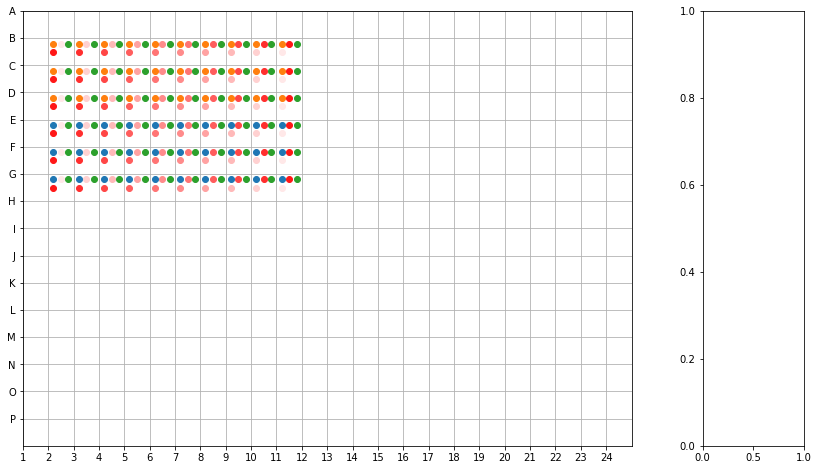

In [96]:
#@markdown And here is a plot of that plate layout in a 384-well plate
layouts = {
    '96-well': {
        'Rows': list('ABCDEFGH'),
        'Columns': list(range(1, 13))
    },
    '384-well': {
        'Rows': list('ABCDEFGHIJKLMNOP'),
        'Columns': list(range(1,25))
    }
}

def convert_well_coords(row, layout):
  y = len(layouts[layout]['Rows']) - layouts[layout]['Rows'].index(row)
  return y
  
def plot_layout(specification, layout):
  # set up the figure
  fig, axs = plt.subplots(ncols = 2, figsize = [14,8], gridspec_kw={'width_ratios': (6,1)})
  axs[0].grid()
  axs[0].set_ylim([0, len(layouts[layout]['Rows'])])
  axs[0].set_yticks(range(1, len(layouts[layout]['Rows'])+1))
  axs[0].set_yticklabels(reversed(layouts[layout]['Rows']))
  axs[0].set_xlim([1, len(layouts[layout]['Columns'])+1])
  axs[0].set_xticks(range(1, len(layouts[layout]['Columns'])+1))
  
  offset = [0.2, 0.2]
  for col in specification.columns[2:]:
    if type(specification[col][0]) == str:
      for level in set(specification[col]):
        x_coords = specification.loc[specification[col] == level]['Column']
        y_coords = [convert_well_coords(x, layout) for x in specification.loc[specification[col] == level]['Row']]
        
        axs[0].scatter([x + offset[0] for x in x_coords], [y - offset[1] for y in y_coords], label = f'{col} ({level})')
    else:
      n_levels = len(set(specification[col]))
      p_range = [x/(n_levels+1) for x in range(1,n_levels + 1)]
      palette = [(1,x,x) for x in p_range]
      sorted_lev = sorted(list(set(specification[col])), reverse = True)
      for i in range(len(sorted_lev)):
        level = sorted_lev[i]
        x_coords = specification.loc[specification[col] == level]['Column']
        y_coords = [convert_well_coords(x, layout) for x in specification.loc[specification[col] == level]['Row']]
        
        axs[0].scatter([x + offset[0] for x in x_coords], [y - offset[1] for y in y_coords], color = palette[i], label = f'{col} ({level})')
    if offset[0] < 0.8:
      offset[0] += 0.3
    else:
      offset[0] = 0.2
      offset[1] += 0.3

  plt.show()

plot_layout(demo, '384-well')

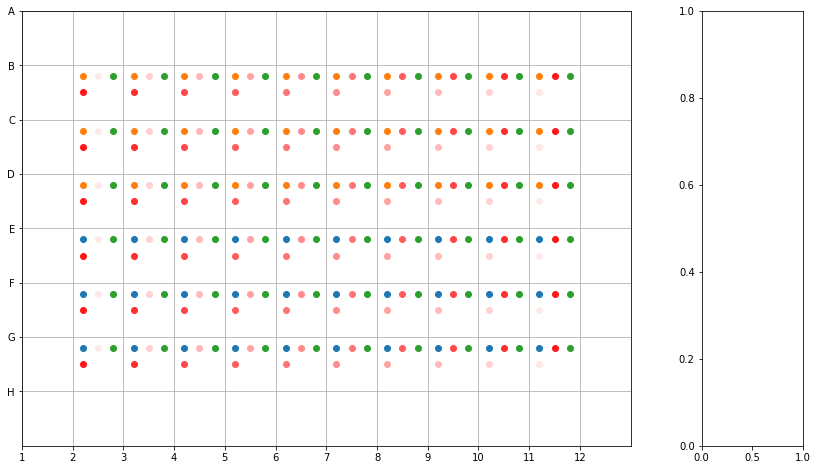

In [97]:
#@markdown And a 96-well plate
plot_layout(demo, '96-well')

This isn't a universally useful format. If you have more than nine variables, the cell will run out of room. This is something I could fix, but frankly, if you have more than nine things varying across your plate, you might have too complicated an experiment!